# CA Institutional Social Report - July

## Imported Packages

In [1]:
# modules
import numpy as np
from numpy import typing as npt
from typing import Type
import pandas as pd

# local modules
from modules.scalers import Scaler

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# import seaborn as sns

## Reading Data

Setting variables for relative paths to datasets for easy access.

In [2]:
linkedin_update_engagement_path = '../../datasets/ca_institutional/linkedin/070621_070722_update_engagement.csv'
linkedin_update_metrics_path = '../../datasets/ca_institutional/linkedin/070621_070722_update_metrics.csv'

Reading datasets with pandas.

In [3]:
li_update_engagement_df = pd.read_csv(linkedin_update_engagement_path)
li_update_metrics_df = pd.read_csv(linkedin_update_metrics_path)

Previewing LinkedIn update engagement data

In [4]:
li_update_engagement_df.head()

,Update title,Update link,Update type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate,Content Type
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/28/2022,NaN,NaN,All followers,32,NaN,2,0.062500,0,0,0,NaN,0.062500,NaN
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/16/2022,NaN,NaN,All followers,44,NaN,1,0.022727,0,0,0,NaN,0.022727,NaN
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/16/2022,NaN,NaN,All followers,32,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/14/2022,NaN,NaN,All followers,61,NaN,0,0.000000,1,0,0,NaN,0.016393,NaN
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/08/2022,NaN,NaN,All followers,61,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN


Previewing LinkedIn update metrics data.

In [5]:
li_update_metrics_df.head()

,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
0,07/07/2021,27,756,783,15,0,3,3,0,0,0,0,0,0,0,0,0,0.000000,0.003968,0.003831
1,07/08/2021,115,705,820,64,1,2,3,1,0,1,0,0,0,0,0,0,0.017391,0.004255,0.006098
2,07/09/2021,20,690,710,16,0,4,4,0,0,0,0,0,0,0,0,0,0.000000,0.007246,0.007042
3,07/10/2021,14,467,481,11,0,1,1,0,0,0,0,0,0,0,0,0,0.000000,0.004283,0.004158
4,07/11/2021,2,445,447,2,0,2,2,0,1,1,0,0,0,0,0,0,0.500000,0.008989,0.011186


## Dataset Definitions

Update Engagement Dataset: Metrics for all social posts

Update Metrics Dataset: Daily aggregated metrics

## Data Exploration

### Update Engagement Dataset

Taking a look at the shape of our data.

In [6]:
li_update_engagement_df.shape

(94, 19)

Our dataset is very small, which is to be expected. Each row in the dataset corresponds to a social post. Institutional channels have a significantly lower number of posts in relation to retail channels. This is especially true of Invesco's Canadian Institutional channels.

Reviewing datatypes and features.

In [7]:
li_update_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Update title              93 non-null     object 
 1   Update link               94 non-null     object 
 2   Update type               94 non-null     object 
 3   Campaign name             9 non-null      object 
 4   Posted by                 94 non-null     object 
 5   Created date              94 non-null     object 
 6   Campaign start date       9 non-null      object 
 7   Campaign end date         9 non-null      object 
 8   Audience                  94 non-null     object 
 9   Impressions               94 non-null     int64  
 10  Views                     7 non-null      float64
 11  Clicks                    94 non-null     int64  
 12  Click through rate (CTR)  94 non-null     float64
 13  Likes                     94 non-null     int64  
 14  Comments    

Describing the dataset.

In [8]:
li_update_engagement_df.describe()

,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Shares,Follows,Engagement rate
count,94.000000,7.000000,94.000000,94.000000,94.000000,94.0,94.000000,17.0,94.000000
mean,5177.297872,5.142857,18.893617,0.009808,1.531915,0.0,0.010638,0.0,0.015532
std,15446.268813,5.336309,50.369275,0.014257,3.391013,0.0,0.103142,0.0,0.024297
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,43.250000,1.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,68.000000,3.000000,1.000000,0.003340,0.000000,0.0,0.000000,0.0,0.008814
75%,152.250000,7.500000,3.000000,0.015338,1.000000,0.0,0.000000,0.0,0.023189
max,69961.000000,15.000000,217.000000,0.075000,23.000000,0.0,1.000000,0.0,0.175000


There are several important takeaways that we can get simply from the description of our dataset's numeric columns:

1. The counts are negligible - we will need to check those with the use of sum instead
2. Mean figures could be pertinent reporting metrics to assess post performance at a high level
3. The standard deviation figures highlight that impression and click performance varies widely from the mean depending on the post, which is cause for further analysis
4. We need to establish best practices for determining metric benchmarks - should we use a measure of central tendency or dispersion?

Examination of dataset histograms.

array([[<AxesSubplot:title={'center':'Impressions'}>,
        <AxesSubplot:title={'center':'Views'}>,
        <AxesSubplot:title={'center':'Clicks'}>],
       [<AxesSubplot:title={'center':'Click through rate (CTR)'}>,
        <AxesSubplot:title={'center':'Likes'}>,
        <AxesSubplot:title={'center':'Comments'}>],
       [<AxesSubplot:title={'center':'Shares'}>,
        <AxesSubplot:title={'center':'Follows'}>,
        <AxesSubplot:title={'center':'Engagement rate'}>]], dtype=object)

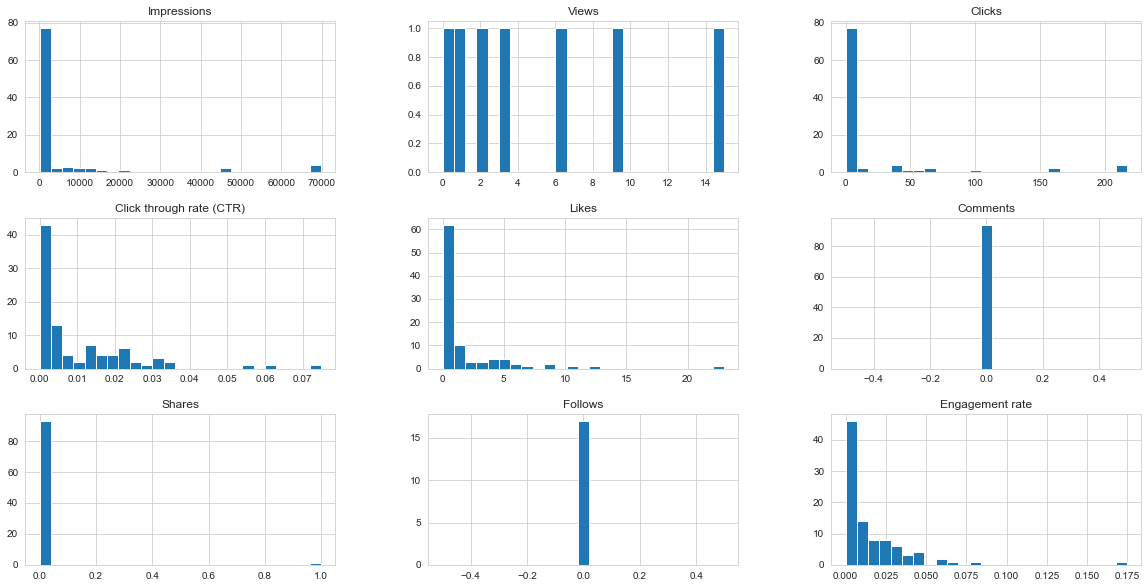

In [9]:
li_update_engagement_df.hist(bins=25, figsize=(20,10))

Impressions, clicks, click through rate, likes, and engagement rate appear to be heavy tail distributions. These distributions make mean a misleading measure of central tendency.

There are likely correlations that can be inferred across the above numerical features given their relative distributions.

## Cleaning Data

### Update Engagement Dataset

Importing modules.

In [10]:
from modules.reformat_feature_name import reformat_feature_name

#### Refactoring Feature Names

We'll reformat our feature names to follow a standardized convention. This will make the code easier to work with, improve readability, and improve reproducability.

To do so, I've created a module to handle the reformatting processes. A modular format was implemented to enable unit testing without the unnecessary overhead that comes with importing modules from jupyter notebooks and littering this code with unittest test cases.

Here's our implementation:

In [11]:
# extracting list of feature names
cols = li_update_engagement_df.columns

# creating hashmap to map old feature names to their reformatted versions
col_map = {}

# using imported module to clean feature names
for col in cols:
    new_col = reformat_feature_name(col)
    col_map[col] = new_col

# updating feature names within our dataframe
li_update_engagement_df.rename(columns=col_map, inplace=True)

Performing additional cleanup:

In [12]:
li_update_engagement_df.rename(columns={'click_through_rate_ctr': 'click_through_rate'}, inplace=True)

Previewing the final result

In [13]:
li_update_engagement_df.head()

,update_title,update_link,update_type,campaign_name,posted_by,created_date,campaign_start_date,campaign_end_date,audience,impressions,views,clicks,click_through_rate,likes,comments,shares,follows,engagement_rate,content_type
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/28/2022,NaN,NaN,All followers,32,NaN,2,0.062500,0,0,0,NaN,0.062500,NaN
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/16/2022,NaN,NaN,All followers,44,NaN,1,0.022727,0,0,0,NaN,0.022727,NaN
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/16/2022,NaN,NaN,All followers,32,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,06/14/2022,NaN,NaN,All followers,61,NaN,0,0.000000,1,0,0,NaN,0.016393,NaN
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,06/08/2022,NaN,NaN,All followers,61,NaN,0,0.000000,0,0,0,NaN,0.000000,NaN


#### Resolving Feature Data Types

Changing created date from object to datetime.

In [14]:
li_update_engagement_df['created_date'] = pd.to_datetime(li_update_engagement_df['created_date'])

In [15]:
li_update_engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   update_title         93 non-null     object        
 1   update_link          94 non-null     object        
 2   update_type          94 non-null     object        
 3   campaign_name        9 non-null      object        
 4   posted_by            94 non-null     object        
 5   created_date         94 non-null     datetime64[ns]
 6   campaign_start_date  9 non-null      object        
 7   campaign_end_date    9 non-null      object        
 8   audience             94 non-null     object        
 9   impressions          94 non-null     int64         
 10  views                7 non-null      float64       
 11  clicks               94 non-null     int64         
 12  click_through_rate   94 non-null     float64       
 13  likes                94 non-null     

#### Handing NaNs

Need to set NaNs to zeros for follows and views. Views may need to be handled separately so that we can filter by video post type with NaNs in this feature - this applies if content type isn't enough for our needs.

In [16]:
col_names_to_fill = ['follows', 'comments', 'views']
for column in col_names_to_fill:
    li_update_engagement_df[column].fillna(0, inplace=True)

In [17]:
li_update_engagement_df

,update_title,update_link,update_type,campaign_name,posted_by,created_date,campaign_start_date,campaign_end_date,audience,impressions,views,clicks,click_through_rate,likes,comments,shares,follows,engagement_rate,content_type
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-28,NaN,NaN,All followers,32,0.0,2,0.062500,0,0,0,0.0,0.062500,NaN
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-16,NaN,NaN,All followers,44,0.0,1,0.022727,0,0,0,0.0,0.022727,NaN
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-16,NaN,NaN,All followers,32,0.0,0,0.000000,0,0,0,0.0,0.000000,NaN
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-14,NaN,NaN,All followers,61,0.0,0,0.000000,1,0,0,0.0,0.016393,NaN
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-08,NaN,NaN,All followers,61,0.0,0,0.000000,0,0,0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Sponsored,Can - DC Language Boosted Posts,Jessica Huban,2021-07-22,08/23/2021,10/28/2021,All followers,13777,0.0,36,0.002613,12,0,0,0.0,0.010888,NaN
90,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Total,NaN,Jessica Huban,2021-07-22,NaN,NaN,All followers,13982,0.0,39,0.002789,23,0,0,0.0,0.011729,NaN
91,"The ESG journey is a continuum, with room for ...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-20,NaN,NaN,All followers,80,0.0,1,0.012500,0,0,0,0.0,0.012500,NaN
92,As asset owners work to integrate ESG across t...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-13,NaN,NaN,All followers,75,0.0,1,0.013333,0,0,0,0.0,0.013333,NaN


## Analyzing Data

### Top 5 Performers by Month

#### Grouping Data

First we group posts by their respective dates. We do so by "extracting" the month value from the `created_date` datetime feature.

Our data spans across more than one year, therefore we'll also need to "extract" the year value from the same feature.

Ultimately, we will group our data by year and month.

In [18]:
# grouping by month
grouped = li_update_engagement_df.groupby(
    [li_update_engagement_df['created_date'].dt.year, li_update_engagement_df['created_date'].dt.month]
)

Now that we have our data grouped appropriately, we'll need to operationalize how we plan on evaluating data points within each. We will employ a weighted approach that makes use of normalization to identify our top performers. These equations will be procedurally applied to our groups based on our input criteria - a given month in this particular case.

#### Creating Weighted Formula

Our top performance evaluation is multidimensional - meaning that we aren't analyzing a scalar to determine which posts are the best, but rather a combination of features.

##### Why Take a Weighted Approach?


While we could calculate the top performers for each of our features or select a singular feature that is most important to us, that approach would be problematic for the following reasons:

1. It isn't providing the end user with the entire picture - that isn't how an analyst determines which posts performed the best overall so neither should our computations
2. It's convoluted - there would be either too much information or a need to explain why a majority of the information was ostracized from consideration
3. Introduces heavy bias - selecting a single feature would introduce a heavy amount of bias and providing top performing posts for all features allows for the possibility of the end user misinterpreting the true results due to their own biases

By weighting each feature and using that weight to calculate our top performers, we mitigate most of the items listed above. Our weights will be biased inherently because there has yet to be an analysis completed on calculating these weights empirically.

A weighted approach provides us with a pre-defined methodology that can be reassessed quickly and easily.

##### Methodology

###### Weighted Feature Formula

Given a feature value $x$ and its associated weight value $w$, the final weight of a given feature set can be calculated with the following formula:

$ \Large r^ \prime = \sum_{i=0}^{n} x_i^ \prime w_i^ \prime $

Where:
- $ r^ \prime \ $ represents the normalized coefficient
- $ x_i^ \prime \ $ represents a given normalized feature value
- $ w_i^ \prime \ $ represents the normalized weighted value for feature $ x_i $

In other words, the normalized coefficient $\beta$ is equal to the sum of the product of each normalized feature value and it's respective normalized weight.

 ###### Linear Normalization Formula

$ \Large x^ \prime = \dfrac { (x - X_{min}) }  { (X_{max} - X_{min}) }$

Where:
- $ x^ \prime \ $ represents the normalized value
- $ x \ $ represents a non-normalized value
- $ X \ $ represents the set of non-normalized values
- $ X_{min} \ $ represents the minimum value within the set of non-normalized values
- $ X_{max} \ $ represents the maximum value within the set of non-normalized values

###### Log Scaling Formula

Our data can also be scaled logarithmically. Log scaling is useful where a few of our data points contain high value counts where the opposite is true for a majority of data points. Impression, share, and engagement rate data are all good examples of where this could be implemented.


$ \Large x^ \prime = log(x) $

Where:
- $ x^ \prime \ $ represents the normalized value
- $ x \ $ represents a non-normalized value

A critical part of this approach is the weights themselves. While we could use standard deviation or other mathematical methods as a weighting mechanism, we will manually decide on weights for two reasons:

1. To lean on the digital marketing expertise of our analysts in deciding feature importance
2. To maintain simplicity

In this section, we will define the features that require weighting, create a general order of feature importance, and finally assign weights to each feature.

###### Weighted Feature List

Here's a list of features that we will need to provide with weights. They are cardinal numbers directly tied to the evaluation of quantitative post performance.

We won't introduce string features into our analysis for now. That can be done later should natural language processing be required.

- Impressions
- Views
- Clicks
- Click Through Rate (CTR)
- Likes
- Comments
- Shares
- Follows
- Engagement Rate

###### Features In Relative Order

Lower is better (e.g. item 1 is more important, relatively speaking, than 3).

1. Follows
2. Shares
3. Engagement Rate
4. Comments
5. Clicks
6. CTR
7. Likes
8. Impressions
9. Views

> An important note to acknowledge here is that it may be beneficial to run several analyses rather than one:
>
> 1. Overall best performers
> 2. Top performing static posts (image and/or text only)
> 3. Top performing video posts
>
> In practice video metrics are weighted differently than static posts. Video view metrics are entirely obselete when it comes to static posts, and thus may inappropriately skew the results.

###### Assigning Feature Weights

We will assign feature weights with the use of a hashmap. This will ensure that our weights are both easily accessible with knowledge of their respective feature names and reusable at later points in the code.

In [19]:
relative_update_engagement_feature_weights: dict[str|int] = {
    'follows': 60,
    'shares': 25,
    'engagement_rate': 10,
    'comments': 9,
    'clicks': 3,
    'click_through_rate': 6,
    'likes': 2,
    'impressions': 2,
    'views': 1
}

###### Transforming Arbitrary Weights to Ratios

Let's scale our defined weights. They are currently arbitrary but it would be much easier to understand their meaning if they were expressed as a ratio of 1. Think of this as turning our numbers into a percentage.

This is done to mold our defined wieghts into a cast with the range from 0 to 1 while maintaining their relativity to one another

In other words, it doens't matter what our initial weights actually are, but only that the distance between each other is representative of their relative impact on what we define as optimal performance.

This way, they can be as large or as small as the analyst wants initially. Our approach makes it simple for wieghts to be defined without having to focus on the math behind it all which adds the extra benefit of avoiding mathematical human error on input.

We will turn this into a scaler method in the near future.

In [20]:
# make weights add up to 1

weight_sum = sum(relative_update_engagement_feature_weights.values())
for name, weight in relative_update_engagement_feature_weights.items():
    new_weight = weight / weight_sum
    relative_update_engagement_feature_weights[name] = new_weight

Previewing our new feature weights.

In [21]:
# new feature weights
print('NEW FEATURE WEIGHTS\n')
for feature_name, feature_weight in relative_update_engagement_feature_weights.items():
    print(f'{feature_name}: {feature_weight}')

NEW FEATURE WEIGHTS

follows: 0.5084745762711864
shares: 0.211864406779661
engagement_rate: 0.0847457627118644
comments: 0.07627118644067797
clicks: 0.025423728813559324
click_through_rate: 0.05084745762711865
likes: 0.01694915254237288
impressions: 0.01694915254237288
views: 0.00847457627118644


Notice that these weights can now be expressed as a percentage of the whole, where the whole represents a singular post. The sum of a post's weight should be 1 or 100% because all weighted features play a part in that post's performance.

If we later decide that this is not or should not be the case, we can refactor our weights by either removing a feature or by setting it's weight ratio to zero. That is yet another benefit of this approach.

Let's preview our new weights as percentages and verify that the weights sum to 100%.

In [22]:
# new feature weights as percentages
print('NEW FEATURE WEIGHTS')
print('-------------------')
for feature_name, feature_weight in relative_update_engagement_feature_weights.items():
    print(f'{feature_name}: {feature_weight:.2%}')

print('\nNEW FEATURE SUM')
print('---------------')
new_sum = sum(list(relative_update_engagement_feature_weights.values()))
print(f'{new_sum:.2%}')

NEW FEATURE WEIGHTS
-------------------
follows: 50.85%
shares: 21.19%
engagement_rate: 8.47%
comments: 7.63%
clicks: 2.54%
click_through_rate: 5.08%
likes: 1.69%
impressions: 1.69%
views: 0.85%

NEW FEATURE SUM
---------------
100.00%


#### Implementing Weighted Formula

##### Normalizing Features With Min-Max Scaler

Now we need to normalize our feature values before applying the weights.

In [23]:
# apply weights to each applicable feature

li_update_engagement_df

,update_title,update_link,update_type,campaign_name,posted_by,created_date,campaign_start_date,campaign_end_date,audience,impressions,views,clicks,click_through_rate,likes,comments,shares,follows,engagement_rate,content_type
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-28,NaN,NaN,All followers,32,0.0,2,0.062500,0,0,0,0.0,0.062500,NaN
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-16,NaN,NaN,All followers,44,0.0,1,0.022727,0,0,0,0.0,0.022727,NaN
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-16,NaN,NaN,All followers,32,0.0,0,0.000000,0,0,0,0.0,0.000000,NaN
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-14,NaN,NaN,All followers,61,0.0,0,0.000000,1,0,0,0.0,0.016393,NaN
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-08,NaN,NaN,All followers,61,0.0,0,0.000000,0,0,0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Sponsored,Can - DC Language Boosted Posts,Jessica Huban,2021-07-22,08/23/2021,10/28/2021,All followers,13777,0.0,36,0.002613,12,0,0,0.0,0.010888,NaN
90,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Total,NaN,Jessica Huban,2021-07-22,NaN,NaN,All followers,13982,0.0,39,0.002789,23,0,0,0.0,0.011729,NaN
91,"The ESG journey is a continuum, with room for ...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-20,NaN,NaN,All followers,80,0.0,1,0.012500,0,0,0,0.0,0.012500,NaN
92,As asset owners work to integrate ESG across t...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-13,NaN,NaN,All followers,75,0.0,1,0.013333,0,0,0,0.0,0.013333,NaN


Defining functions that will handle the grunt work for us:

In [24]:
def get_feature_values(col_name: str, data_frame: pd.DataFrame) -> tuple[str, np.ndarray]:
    """Access feature values of a given column within a given data frame.

    :param col_name: name of a column within the dataframe
    :param data_frame: a pandas dataframe that contains the column name passed in col_name
    :return: a tuple of the passed column name and the values of that column
    """

    return col_name, data_frame[f'{col_name}'].values

def apply_normalizer(col_data: tuple[str, list[int] | np.ndarray]) -> tuple[str, list[int] | np.ndarray]:
    """Apply the min_max normalizer to values.

    :param col_data: tuple of the data's label and it's values
    :return: tuple of the data's label and it's normalized values
    """

    col_name, col_values = col_data
    scaler = Scaler(col_values)
    _normalized_values = scaler.min_max()

    return col_name, _normalized_values

def create_normalized_feature_column(norm_col_data: tuple[str, list[int] | np.ndarray], data_frame: pd.DataFrame) -> None:
    """Creates columns within a data frame for the passed column data.

    :param norm_col_data: tuple of the data's label and it's normalized values
    :param data_frame: the dataframe that the normalized values are to be inserted to.
    :return: None
    """

    col_name, normalized_col_values = norm_col_data
    data_frame[f'norm_{col_name}'] = normalized_col_values

Calling our function on each of the data frame columns:

In [25]:
for feature_name in relative_update_engagement_feature_weights.keys():
    feature_info = get_feature_values(feature_name, li_update_engagement_df)
    normalized_feature_info = apply_normalizer(feature_info)
    create_normalized_feature_column(normalized_feature_info, li_update_engagement_df)

Our normalized values for each feature have been added to our original data frame. Here's the result:

In [26]:
li_update_engagement_df

,update_title,update_link,update_type,campaign_name,posted_by,created_date,campaign_start_date,campaign_end_date,audience,impressions,...,content_type,norm_follows,norm_shares,norm_engagement_rate,norm_comments,norm_clicks,norm_click_through_rate,norm_likes,norm_impressions,norm_views
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-28,NaN,NaN,All followers,32,...,NaN,0,0.0,0.357143,0,0.009217,0.833333,0.000000,0.000186,0.0
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-16,NaN,NaN,All followers,44,...,NaN,0,0.0,0.129870,0,0.004608,0.303030,0.000000,0.000357,0.0
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-16,NaN,NaN,All followers,32,...,NaN,0,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000186,0.0
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-14,NaN,NaN,All followers,61,...,NaN,0,0.0,0.093677,0,0.000000,0.000000,0.043478,0.000600,0.0
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-08,NaN,NaN,All followers,61,...,NaN,0,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Sponsored,Can - DC Language Boosted Posts,Jessica Huban,2021-07-22,08/23/2021,10/28/2021,All followers,13777,...,NaN,0,0.0,0.062215,0,0.165899,0.034841,0.521739,0.196706,0.0
90,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Total,NaN,Jessica Huban,2021-07-22,NaN,NaN,All followers,13982,...,NaN,0,0.0,0.067025,0,0.179724,0.037191,1.000000,0.199637,0.0
91,"The ESG journey is a continuum, with room for ...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-20,NaN,NaN,All followers,80,...,NaN,0,0.0,0.071429,0,0.004608,0.166667,0.000000,0.000872,0.0
92,As asset owners work to integrate ESG across t...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-13,NaN,NaN,All followers,75,...,NaN,0,0.0,0.076190,0,0.004608,0.177778,0.000000,0.000801,0.0


Taking another look at our distributions:

array([[<AxesSubplot:title={'center':'norm_follows'}>,
        <AxesSubplot:title={'center':'norm_shares'}>,
        <AxesSubplot:title={'center':'norm_engagement_rate'}>],
       [<AxesSubplot:title={'center':'norm_comments'}>,
        <AxesSubplot:title={'center':'norm_clicks'}>,
        <AxesSubplot:title={'center':'norm_click_through_rate'}>],
       [<AxesSubplot:title={'center':'norm_likes'}>,
        <AxesSubplot:title={'center':'norm_impressions'}>,
        <AxesSubplot:title={'center':'norm_views'}>]], dtype=object)

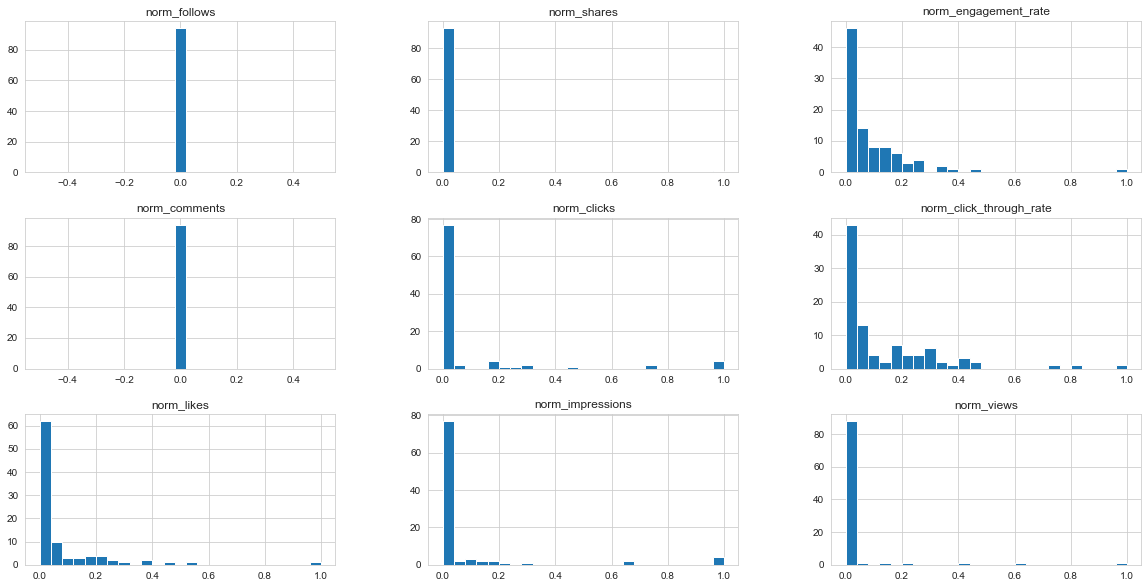

In [27]:
li_update_engagement_df.iloc[:, -9:].hist(bins=25, figsize=(20,10))

Note that our values are distributed between the range of 0 and 1.

Our new distributions confirm our intuition that a min_max scaler is likely not the optimal solution. There is a large range within the data for a majority of our features. For this reason, it would be beneficial to implement our log scaler.

Log scaling of our y-axis can also be done directly within or data visualizations as shown in the next sections.

##### Applying Feature Weights to Min-Max Normalized Values

Now that we have normalized our feature values, we need to apply our weighting formula to get it's performance value within our described framework.

To do so we'll need to apply our weighting formula to each row in our dataframe. We'll create a method to do this for us.

In [28]:
def weighting(row):
    weighted_values = []
    for feature_name, feature_weight in relative_update_engagement_feature_weights.items():
        weighted_values.append(row[f'norm_{feature_name}'] * feature_weight)
    weighted_sum = sum(weighted_values)
    return weighted_sum

In [29]:
li_update_engagement_df['weighted_sum'] = li_update_engagement_df.apply(weighting, axis=1)

In [30]:
li_update_engagement_df

,update_title,update_link,update_type,campaign_name,posted_by,created_date,campaign_start_date,campaign_end_date,audience,impressions,...,norm_follows,norm_shares,norm_engagement_rate,norm_comments,norm_clicks,norm_click_through_rate,norm_likes,norm_impressions,norm_views,weighted_sum
0,Chief Global Market Strategist Kristina Hooper...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-28,NaN,NaN,All followers,32,...,0,0.0,0.357143,0,0.009217,0.833333,0.000000,0.000186,0.0,0.072877
1,Kristina Hooper takes a closer look at the U.S...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-16,NaN,NaN,All followers,44,...,0,0.0,0.129870,0,0.004608,0.303030,0.000000,0.000357,0.0,0.026537
2,Asset owners are turning to private credit for...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-16,NaN,NaN,All followers,32,...,0,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000186,0.0,0.000003
3,"After Friday’s record U.S. inflation number, m...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Marquis Chester,2022-06-14,NaN,NaN,All followers,61,...,0,0.0,0.093677,0,0.000000,0.000000,0.043478,0.000600,0.0,0.008686
4,"Scott Baskind, Invesco’s Head of Global Privat...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Xavier Gill,2022-06-08,NaN,NaN,All followers,61,...,0,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000600,0.0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Sponsored,Can - DC Language Boosted Posts,Jessica Huban,2021-07-22,08/23/2021,10/28/2021,All followers,13777,...,0,0.0,0.062215,0,0.165899,0.034841,0.521739,0.196706,0.0,0.023439
90,"#PlanSponsors, new DC research shows even youn...",https://www.linkedin.com/feed/update/urn:li:ac...,Total,NaN,Jessica Huban,2021-07-22,NaN,NaN,All followers,13982,...,0,0.0,0.067025,0,0.179724,0.037191,1.000000,0.199637,0.0,0.032473
91,"The ESG journey is a continuum, with room for ...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-20,NaN,NaN,All followers,80,...,0,0.0,0.071429,0,0.004608,0.166667,0.000000,0.000872,0.0,0.014660
92,As asset owners work to integrate ESG across t...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jessica Huban,2021-07-13,NaN,NaN,All followers,75,...,0,0.0,0.076190,0,0.004608,0.177778,0.000000,0.000801,0.0,0.015627


##### Visualizing weighted values:

In [33]:
# Todo: make chart interactive by giving ability to toggle between min-max and log scaled values

fig = px.bar(
    li_update_engagement_df[['update_title', 'weighted_sum']],
    x='update_title',
    y='weighted_sum',
    color='update_title',
    labels={'update_title': 'Post', 'weighted_sum': 'Weighted Sum'}
)

fig.update_layout({
    'height':600,
    'showlegend': False
})

fig.update_xaxes({
    'showticklabels': False
})

fig.show()